In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import itertools
import os

In [2]:
def sample_to_list(data_type, sample_str):
    match data_type:
        case 'Rubtsov_samples':
            return [int(i) for i in sample_str]
        
        case 'Rubtsov_check':
            sample = [int(i) for i in sample_str]
            if len(sample) < modes_num:
                sample = [0 for _ in range(modes_num - len(sample))] + sample
            return sample
        
        case 'Mazanik':
            return [int(i) for i in sample_str.strip("][").split(',')]
        
        case 'SF':
            return [int(i) for i in sample_str.strip("][").split(' ')]

def calc_fock_basis(ph_num, modes_num):
    basis = []
    slots_num = ph_num + modes_num
    all_comb_bars = list(itertools.combinations(range(1, slots_num), modes_num - 1))
    for bars in all_comb_bars:
        bars = list(bars)
        bars.append(slots_num)
        bars.insert(0, 0)
        basis_vec = []
        for i in range(modes_num):
            basis_vec.append(bars[i+1] - bars[i] - 1)
        basis.append(basis_vec)

    return basis

def data_base_prob(data, all_samples, base_type):
    match base_type:
        case 'Rubtsov_samples':
            with open(os.path.join('samples', base_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('  ')
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
        
        case 'Rubtsov_check':
            with open(os.path.join('samples', base_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample = f_sample.split('  ')[0] 
                    probability = f_sample.split('  ')[2] 
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
        
        case 'Mazanik':
            with open(os.path.join('samples', base_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('\t')
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
            
        case 'SF':
            with open(os.path.join('samples', base_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('\t')
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
    
    return data
    
def data_subject_prob(data, all_samples, subject_type):
    match subject_type:
        case 'Rubtsov_samples':
            with open(os.path.join('samples', subject_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('  ')
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['subject_prob'] = round(float(probability), 6)           
        
        case 'Rubtsov_check':
            print(subject_type)
        
        case 'Mazanik':
            occurrences = [0 for _ in range(len(all_samples))]
            
            with open(os.path.join('samples', subject_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('\t')
                    sample = sample_to_list(subject_type, sample)
                    
                    occurrences[all_samples.index(sample)] += 1
            
            batch_size = sum(occurrences)
            subject_prob = [i / batch_size for i in occurrences]
            
            for i in range(len(all_samples)):
                data[i]['subject_prob'] = round(subject_prob[i], 6)
            
            
        case 'SF':
            print(subject_type)
    
    return data
    

def make_data_list(base_type, subject_type):
    all_samples = calc_fock_basis(photons_num, modes_num)
    
    data = [
        dict([
            ('sample', sample),
            ('base_prob', 0),
            ('subject_prob', 0)
        ]) for sample in all_samples
    ]
    
    
    data = data_base_prob(data, all_samples, base_type)
    data = data_subject_prob(data, all_samples, subject_type)
    
    return data

## Reading Boson Sampling data

### Setting data types to read
Set the type of data to be read according to the Sampler being used. 

Options: 'Rubtsov_samples', 'Rubtsov_check', 'Mazanik' or 'SF'

In [9]:
subject_type = 'Mazanik'
base_type = 'Rubtsov_samples'

subject_data_file_name = 'sample.txt'
base_data_file_name = 'samples.dat'

photons_num = 5
modes_num = 7

data_types = ['Rubtsov_samples', 'Rubtsov_check', 'Mazanik', 'SF']

if base_type in data_types and subject_type in data_types:
    print("comparison subject type:", subject_type)
    print("comparison base type:", base_type)
    print("photons number:", photons_num)
    print("modes number:", modes_num)
    print("different samples number:", int(scipy.special.binom(photons_num + modes_num - 1, photons_num)))
else:
    print("ERROR: this type of data does not exist")

comparison subject type: Mazanik
comparison base type: Rubtsov_samples
photons number: 5
modes number: 7
different samples number: 462


In [10]:
data = make_data_list(base_type, subject_type)
print(data)

[{'sample': [0, 0, 0, 0, 0, 0, 5], 'base_prob': 0.001119, 'subject_prob': 0.001194}, {'sample': [0, 0, 0, 0, 0, 1, 4], 'base_prob': 0.000862, 'subject_prob': 0.000928}, {'sample': [0, 0, 0, 0, 0, 2, 3], 'base_prob': 0.000607, 'subject_prob': 0.000624}, {'sample': [0, 0, 0, 0, 0, 3, 2], 'base_prob': 0.000388, 'subject_prob': 0.000412}, {'sample': [0, 0, 0, 0, 0, 4, 1], 'base_prob': 0.001784, 'subject_prob': 0.0018}, {'sample': [0, 0, 0, 0, 0, 5, 0], 'base_prob': 0.000559, 'subject_prob': 0.000556}, {'sample': [0, 0, 0, 0, 1, 0, 4], 'base_prob': 0.003373, 'subject_prob': 0.00335}, {'sample': [0, 0, 0, 0, 1, 1, 3], 'base_prob': 0.000164, 'subject_prob': 0.000158}, {'sample': [0, 0, 0, 0, 1, 2, 2], 'base_prob': 0.001915, 'subject_prob': 0.001948}, {'sample': [0, 0, 0, 0, 1, 3, 1], 'base_prob': 0.002465, 'subject_prob': 0.002474}, {'sample': [0, 0, 0, 0, 1, 4, 0], 'base_prob': 6.8e-05, 'subject_prob': 7e-05}, {'sample': [0, 0, 0, 0, 2, 0, 3], 'base_prob': 0.002512, 'subject_prob': 0.002434}

### Exporting analysis data (to do)

In [78]:
export_file = 'sample_analysis.txt'

In [79]:
with open('analysis/' + export_file, 'w') as f_sampler_analysis:
    for note in data:
        f_sampler_analysis.write(str(note['sample']) + '\t' + str(note['ground_truth']) + '\t' + str(note['experiment']) + '\n')

### Show analysis data

In [11]:
for note in data:
        print(str(note['sample']) + '\t' + 
              str(note['base_prob']) + '\t' + 
              str(note['subject_prob']) + '\t' + '\t' + '\t' +
              str(round(note['subject_prob']/note['base_prob'], 2)))

[0, 0, 0, 0, 0, 0, 5]	0.001119	0.001194			1.07
[0, 0, 0, 0, 0, 1, 4]	0.000862	0.000928			1.08
[0, 0, 0, 0, 0, 2, 3]	0.000607	0.000624			1.03
[0, 0, 0, 0, 0, 3, 2]	0.000388	0.000412			1.06
[0, 0, 0, 0, 0, 4, 1]	0.001784	0.0018			1.01
[0, 0, 0, 0, 0, 5, 0]	0.000559	0.000556			0.99
[0, 0, 0, 0, 1, 0, 4]	0.003373	0.00335			0.99
[0, 0, 0, 0, 1, 1, 3]	0.000164	0.000158			0.96
[0, 0, 0, 0, 1, 2, 2]	0.001915	0.001948			1.02
[0, 0, 0, 0, 1, 3, 1]	0.002465	0.002474			1.0
[0, 0, 0, 0, 1, 4, 0]	6.8e-05	7e-05			1.03
[0, 0, 0, 0, 2, 0, 3]	0.002512	0.002434			0.97
[0, 0, 0, 0, 2, 1, 2]	0.000347	0.00034			0.98
[0, 0, 0, 0, 2, 2, 1]	0.002112	0.002096			0.99
[0, 0, 0, 0, 2, 3, 0]	0.000157	0.00017			1.08
[0, 0, 0, 0, 3, 0, 2]	0.000466	0.000522			1.12
[0, 0, 0, 0, 3, 1, 1]	0.00073	0.000778			1.07
[0, 0, 0, 0, 3, 2, 0]	0.000453	0.000444			0.98
[0, 0, 0, 0, 4, 0, 1]	1.9e-05	2.4e-05			1.26
[0, 0, 0, 0, 4, 1, 0]	0.000253	0.00023			0.91
[0, 0, 0, 0, 5, 0, 0]	2.3e-05	3.8e-05			1.65
[0, 0, 0, 1, 0, 0, 4]	0.00024

ZeroDivisionError: float division by zero

### Sort samples

In [12]:
data_collisions = [[] for _ in range(photons_num)]

for note in data:
    collisions_num = max(note['sample'])
    data_collisions[collisions_num - 1].append(note)

### Graphical representation of data

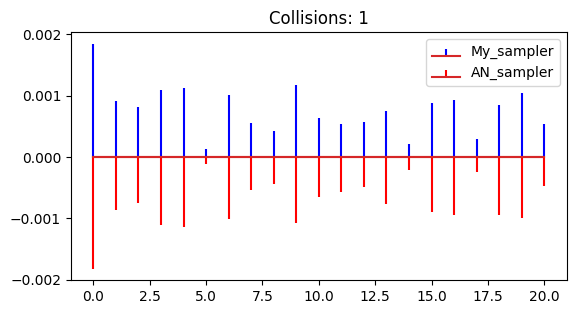

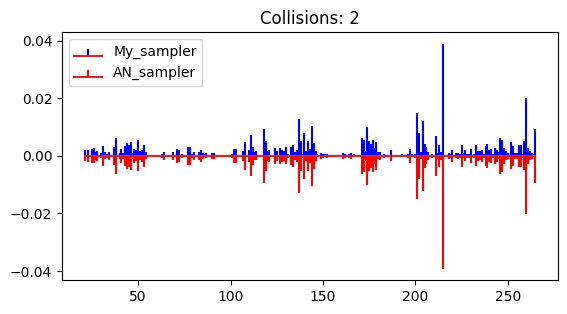

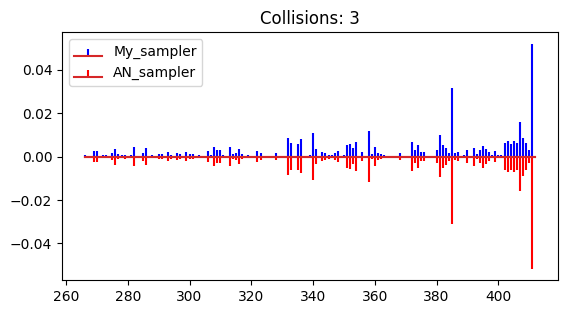

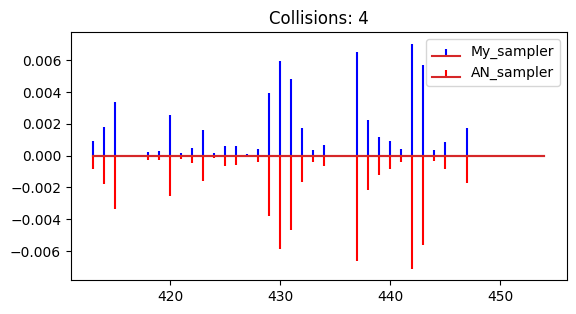

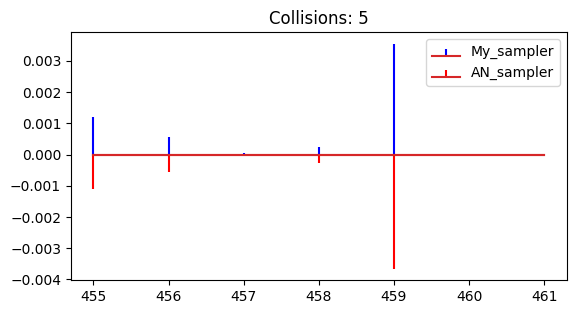

In [21]:
x_current = 0

for i in range(photons_num):
    if data_collisions[i] != []:
        fig, ax = plt.subplots()
        
        x = np.arange(x_current, x_current + len(data_collisions[i]), 1)
        x_current += len(data_collisions[i])

        y1 = [note['subject_prob'] for note in data_collisions[i]]
        y2 = [-note['base_prob'] for note in data_collisions[i]]


        ax.stem(x, y1, 'b', markerfmt='', label="My_sampler")
        ax.stem(x, y2, 'r', markerfmt='', label="AN_sampler")

        ratio = 0.5
        x_left, x_right = ax.get_xlim()
        y_low, y_high = ax.get_ylim()
        ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
        ax.legend()
        
        plt.title("Collisions: " + str(i+1))
        
        #plt.show()

        plt.savefig('samples/analysis_results/fig' + str(i+1) + '.pdf',  format = 'pdf')

### Fidelity and TVD

In [22]:
fidelity = 0
tvd = 0

for note in data:
    fidelity += np.sqrt(note['base_prob'] * note['subject_prob'])
    tvd += abs(note['base_prob'] - note['subject_prob']) / 2
    
print('fidelity:', round(fidelity, 4))
print('tvd:', round(tvd, 4))

fidelity: 0.9998
tvd: 0.0092
